In [1]:
%%shell
#wget https://bit.ly/3lH1hKU 
pip install bert-tensorflow sentencepiece


In [2]:
#pip install -U sentence-transformers
#pip install langdetect

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%%shell
#cp /content/drive/MyDrive/kaggle.json /root/.kaggle/
#kaggle datasets download -d rounakbanik/the-movies-dataset
#unzip the-movies-dataset.zip

In [5]:
%%shell
#unzip /content/MovieSummaries.tar.gz
#7z x  /content/MovieSummaries.tar.gz
#tar -xvzf  /content/MovieSummaries.tar.gz
pip3 install transformers

In [6]:
import transformers

In [7]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import joblib

%matplotlib inline


In [8]:
#data = pd.read_csv("movies_metadata.csv", sep = ',', header = 0, low_memory=False)
#movies = data[['title','overview','genres']].copy()
#movies.head()

In [9]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [10]:
file_path = '/content/drive/MyDrive/MovieSummaries/'
export_dir = './models/'

In [11]:
meta = pd.read_csv(file_path+"movie.metadata.tsv", sep = '\t',header=None)
meta.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey Mystery,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0"": ""Drama"", ""/m/0hj3n01"": ""Crime Drama""}"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama""}"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic thriller"", ""/m/09blyk"": ""Psychological thriller""}"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [12]:
# rename columns
meta.columns = ["movie_id",1,"movie_name",3,4,5,'language','country',"genre"]

In [13]:
from ast import literal_eval

In [14]:
meta.language = meta.language.apply(lambda s: list(literal_eval(s).values()))

In [15]:
meta.head()

,movie_id,1,movie_name,3,4,5,language,country,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey Mystery,2000-02-16,NaN,95.0,[English Language],"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0"": ""Drama"", ""/m/0hj3n01"": ""Crime Drama""}"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],"{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama""}"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic thriller"", ""/m/09blyk"": ""Psychological thriller""}"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],"{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [16]:
import csv
from tqdm.notebook import tqdm

In [17]:
plots = []

with open(file_path+"plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            if len(row) < 2: continue
            plots.append(row)

0it [00:00, ?it/s]

In [18]:
plots_df = pd.DataFrame(plots)

In [19]:
plots_df.columns = ['movie_id','plot']

In [20]:
# change datatype of 'movie_id'
meta['movie_id'] = meta['movie_id'].astype(str)

# merge meta with movies
movies = pd.merge(plots_df, meta[['movie_id', 'movie_name','language', 'genre']], on = 'movie_id')

movies.head()

,movie_id,plot,movie_name,language,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,[Russian Language],"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World cinema""}"
1,31186339,"The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole...",The Hunger Games,[English Language],"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}"
2,20663735,"Poovalli Induchoodan is sentenced for six years prison life for murdering his classmate. Induchoodan, the only son of Justice Maranchery Karunakara Menon was framed in the case by Manapally Madhavan Nambiar and his crony DYSP Sankaranarayanan to take revenge on idealist judge Menon who had e...",Narasimham,[Malayalam Language],"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama"", ""/m/01chg"": ""Bollywood""}"
3,2231378,"The Lemon Drop Kid , a New York City swindler, is illegally touting horses at a Florida racetrack. After several successful hustles, the Kid comes across a beautiful, but gullible, woman intending to bet a lot of money. The Kid convinces her to switch her bet, employing a prefabricated con. Unfo...",The Lemon Drop Kid,[English Language],"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""Comedy""}"
4,595909,"Seventh-day Adventist Church pastor Michael Chamberlain, his wife Lindy, their two sons, and their nine-week-old daughter Azaria are on a camping holiday in the Outback. With the baby sleeping in their tent, the family is enjoying a barbecue with their fellow campers when a cry is heard. Lindy r...",A Cry in the Dark,[English Language],"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama"", ""/m/01f9r0"": ""Docudrama"", ""/m/03q4nz"": ""World cinema"", ""/m/05bh16v"": ""Courtroom Drama""}"


In [21]:
gs = movies.genre.apply(json.loads)
gs = gs.apply(lambda s: s.values())

In [22]:
movies.genre = gs

In [23]:
# remove samples with 0 genre tags
movies_new = movies[movies.genre.apply(lambda s: len(s)!=0)].copy()
#movies_new.genre = movies_new.genre.apply(lambda s: list(s.values()))

In [24]:
movies_new.shape, movies.shape

((41793, 5), (42204, 5))

In [25]:
movies_new.genre.values[0]

dict_values(['Drama', 'World cinema'])

In [26]:
clusts = ( ('Animal Picture',  
 'Animals'),
 ('Anti-war', 
 'Anti-war film'), 
 ('Biographical film', 
 'Biography', 
 'Biopic [feature]'), 
 ('Comedy', 
 'Comedy film'),
 ('Coming of age', 
 'Coming-of-age film'), 
 ('Education', 
 'Educational'), 
 ('Filipino', 
 'Filipino Movies'), 
 ('Gay', 
 'Gay Interest', 
 'Gay Themed'), 
 ('Gross out', 
 'Gross-out film'), 
 ('Monster', 
 'Monster movie'), 
 ('Pornographic movie', 
 'Pornography'), 
 ('Prison', 
 'Prison film'), 
 ('Sci Fi Pictures original films', 
 'Science Fiction'), 
 ('Social issues', 
 'Social problem film'), 
 ('Superhero', 
 'Superhero movie'), 
 ('Sword and sorcery', 
 'Sword and sorcery films'), 
 ('Tamil cinema', 
 'Tollywood') )

In [27]:
for cl in tqdm(clusts):
  movies_new.genre = movies_new.genre.apply(lambda ss: [cl[0] if s in cl else s for s in ss])

  0%|          | 0/17 [00:00<?, ?it/s]

In [28]:
# get all genre tags in a list
all_genres = []
movies_new.genre.apply(all_genres.extend)
len(set(all_genres))

344

In [29]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

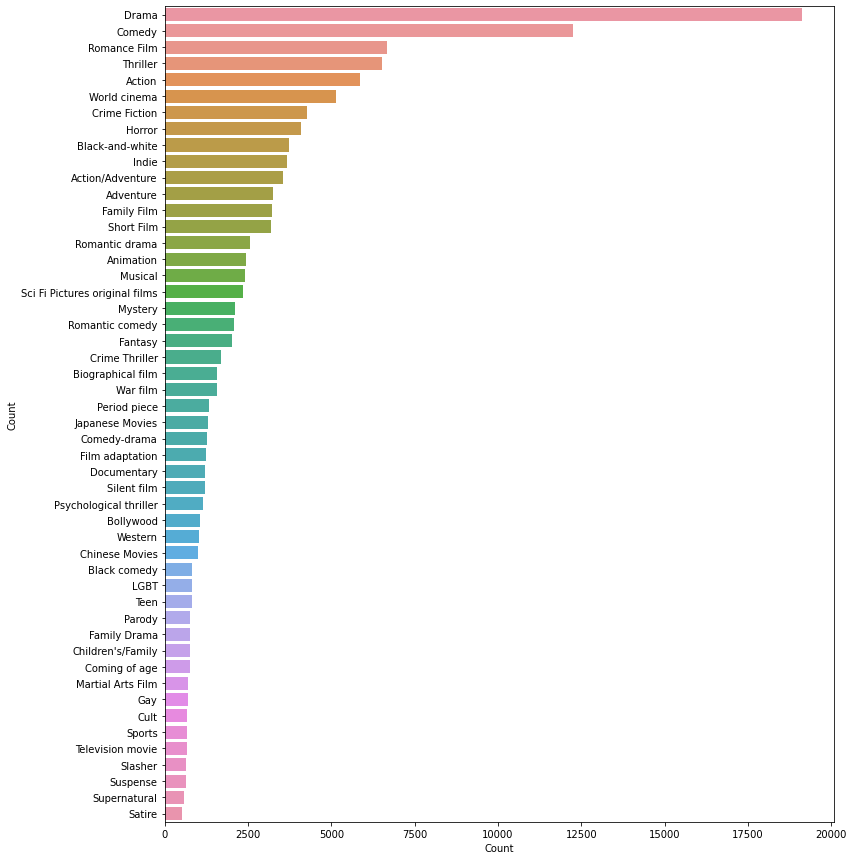

In [30]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [31]:
#nltk.download('stopwords')

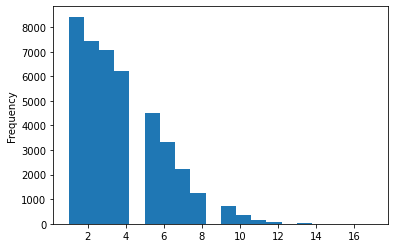

In [32]:
movies_new.genre.apply(len).plot(kind='hist',bins=20)

In [33]:
class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, labels=None):
        """Constructs a InputExample.

        Args:
            guid: Unique id for the example.
            text_a: string. The untokenized text of the first sequence. For single
            sequence tasks, only this sequence must be specified.
            text_b: (Optional) string. The untokenized text of the second sequence.
            Only must be specified for sequence pair tasks.
            labels: (Optional) [string]. The label of the example. This should be
            specified for train and dev examples, but not for test examples.
        """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.labels = labels
class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, input_mask, token_type_ids, labels, is_real_example=True):
        self.input_ids = input_ids
        self.attention_mask = input_mask
        self.token_type_ids = token_type_ids
        self.labels = labels,
        self.is_real_example=is_real_example

In [34]:
def create_examples(df, labels_available=True):
    """Creates examples for the training and dev sets."""
    examples = []
    for (i, row) in enumerate(df.values):
        guid = row[0]
        text_a = row[1]
        if labels_available:
            labels = row[2]
        else:
            labels = np.zeros(len(label_list))
        examples.append(
            InputExample(guid=guid, text_a=text_a, labels=labels))
    return examples

In [35]:
train = movies_new[['movie_id','plot','genre']].dropna()

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()


In [37]:
from pickle import dump,load


try:
  mlb = load(open(file_path+'label_binarizer.pkl', 'rb'))
except:
  mlb = mlb.fit(train.genre.values)
  dump(mlb, open(file_path+'label_binarizer.pkl', 'wb'))

In [38]:
train.genre = train.genre.apply(lambda s: mlb.transform([s]))


In [39]:
train.genre =train.genre.apply(lambda s: s.flatten())


In [40]:
import tensorflow as tf
from transformers import TFBertPreTrainedModel, TFBertMainLayer, TFBertModel
from transformers import BertTokenizer
# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast
# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical


In [41]:
model_name='bert-base-uncased'
label_list = list(set(all_genres))

In [42]:
# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
#config.output_hidden_states = False
# Load BERT tokenizer
# Load the Transformers BERT model
config.problem_type='multi_label_classification'
config.num_labels=len(label_list)
#transformer_model = transformers.TFBertForSequenceClassification.from_pretrained(model_name, config = config)


In [43]:
#transformer_model.summary()

In [44]:
TRAIN_VAL_RATIO = 0.8
TEST_VAL_RATIO = 0.5

LEN = train.shape[0]
SIZE_TRAIN = int(TRAIN_VAL_RATIO*LEN)
SIZE_TEST = int(LEN*(TRAIN_VAL_RATIO + (1-TRAIN_VAL_RATIO)*TEST_VAL_RATIO))


In [45]:
x_train = train[:SIZE_TRAIN]
x_test = train[SIZE_TRAIN:SIZE_TEST]
x_val = train[SIZE_TEST:]


In [46]:

train_examples = create_examples(x_train)
test_examples = create_examples(x_test)
val_examples = create_examples(x_val)


In [47]:
!pip install sentence-transformers

In [48]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#Sentences are encoded by calling model.encode()
embedding = embedding_model.encode(train['plot'].values,normalize_embeddings=True, show_progress_bar=True)


Batches:   0%|          | 0/1307 [00:00<?, ?it/s]

In [49]:
train['embedding'] = [i for i in embedding]

In [50]:
from scipy import spatial
import scipy
tree = spatial.KDTree(np.vstack(embedding))
plot_example = 'the movie was about a dwarf who hides in a hole and fucks bitches all day long. He killed a nigger and then went to jail.'


In [51]:
vec = embedding_model.encode(plot_example,normalize_embeddings=True)

In [52]:
ed, pos = tree.query(vec,100)
#tree.query()
ed/=2 #ed = 2 - 2*cos, we want 1-cos for a normalized score



In [53]:
# Compute train and warmup steps from batch size
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 8
LEARNING_RATE = 2e-4
NUM_TRAIN_EPOCHS = 10
# We'll set sequences to be at most 256 tokens long.
MAX_SEQ_LENGTH = 256

In [54]:
def convert_examples_to_features(examples, tokenizer, label_list, max_seq_length=512):
    """Converts examples to features using specified tokenizer

    Args:
        examples (list): Examples to convert.
        tokenizer (obj): The tokenzier object.
        label_list (list): A list of all the labels.
        max_sequence_length (int): Maximum length of a sequence

    Returns:
        tf.Dataset: A tensorflow dataset.
    """

    features = []
    for ex_index, example in tqdm(enumerate(examples)):
        #print(example.__dict__)
        # Encode inputs using tokenizer
        inputs = tokenizer.encode_plus(
            example.text_a,
            add_special_tokens=True,
            max_length=max_seq_length,
            truncation=True
        )

        input_ids, token_type_ids = inputs["input_ids"], inputs["token_type_ids"]

        # The mask has 1 for real tokens and 0 for padding tokens. Only real tokens are attended to.
        attention_mask = [1] * len(input_ids)

        # Zero-pad up to the sequence length.
        padding_length = max_seq_length - len(input_ids)
        input_ids = input_ids + ([0] * padding_length)
        attention_mask = attention_mask + ([0] * padding_length)
        token_type_ids = token_type_ids + ([0] * padding_length)

        # Create features and add to feature list
        labels = example.labels
        assert (labels.shape==labels.squeeze().shape)
        features.append(
                InputFeatures(input_ids=input_ids,
                              input_mask=attention_mask,
                              token_type_ids=token_type_ids,
                              labels=labels))
    # Generator for creating tensorflow dataset
    def gen():
        for ex in features:
            yield  ({'input_ids': ex.input_ids,
                        'attention_mask': ex.attention_mask,
                        'token_type_ids': ex.token_type_ids},
                    np.array(ex.labels).flatten())

    return tf.data.Dataset.from_generator(gen,
            ({'input_ids': tf.int32,
              'attention_mask': tf.int32,
              'token_type_ids': tf.int32},
             tf.int64),
            ({'input_ids': tf.TensorShape([max_seq_length]),
              'attention_mask': tf.TensorShape([max_seq_length]),
              'token_type_ids': tf.TensorShape([max_seq_length])},
             tf.TensorShape([len(label_list)])))

In [55]:
class TFBertForMultilabelClassification(TFBertPreTrainedModel):

    def __init__(self, config, *inputs, **kwargs):
        super(TFBertForMultilabelClassification, self).__init__(config, *inputs, **kwargs)
        self.num_labels = config.num_labels

        self.bert = TFBertModel.from_pretrained(model_name).layers[0]
        #self.bert.layers[0].trainable=False
        self.dropout = tf.keras.layers.Dropout(config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(config.num_labels,
                                                kernel_initializer=tf.keras.initializers.truncated_normal(config.initializer_range),
                                                name='classifier')

    def call(self, inputs, **kwargs):
        outputs = self.bert(inputs, **kwargs)

        pooled_output = outputs[1]

        pooled_output = self.dropout(pooled_output, training=kwargs.get('training', False))
        
        logits = self.classifier(pooled_output)

        outputs = (logits,) + outputs[2:]  # add hidden states and attention if they are here

        return outputs  # logits, (hidden_states), (attentions)

In [56]:
import transformers

In [57]:
#emb = transformers.TFBertModel.from_pretrained(model_name, config=config)


In [58]:
model_name='bert-base-uncased'
model = TFBertForMultilabelClassification.from_pretrained(model_name,num_labels=len(label_list))
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertForMultilabelClassification: ['nsp___cls', 'mlm___cls']
- This IS 

In [59]:
"""model = tf.keras.Sequential()
#model.add
model.add(tf.keras.layers.Dense(len(label_list),activation='linear',name='classifier'))


# Prepare training: instantiate optimizer, loss and learning rate schedule 
optimizer = tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.PiecewiseConstantDecay([2500,5000,10000],[1e-3,5e-4,1e-4,5e-5]))
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metric1 = tf.keras.metrics.CategoricalAccuracy()
metric2 = tf.keras.metrics.TopKCategoricalAccuracy()



# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=[metric1,metric2])


%load_ext tensorboard


import os, datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)



%tensorboard --logdir logs
y = np.vstack(train['genre'].values)


# Train and evaluate model
history = model.fit(x=embedding, y=y, batch_size=4, callbacks=[tensorboard_callback], epochs=NUM_TRAIN_EPOCHS, validation_split=0.2, verbose=2)

# Save the trained model 
if not os.path.exists(export_dir):
    os.makedirs(export_dir)
model.save_pretrained(export_dir)"""

'model = tf.keras.Sequential()\n#model.add\nmodel.add(tf.keras.layers.Dense(len(label_list),activation=\'linear\',name=\'classifier\'))\n\n\n# Prepare training: instantiate optimizer, loss and learning rate schedule \noptimizer = tf.keras.optimizers.Adam(learning_rate=tf.keras.optimizers.schedules.PiecewiseConstantDecay([2500,5000,10000],[1e-3,5e-4,1e-4,5e-5]))\nloss = tf.keras.losses.BinaryCrossentropy(from_logits=True)\nmetric1 = tf.keras.metrics.CategoricalAccuracy()\nmetric2 = tf.keras.metrics.TopKCategoricalAccuracy()\n\n\n\n# Compile the model\nmodel.compile(optimizer=optimizer, loss=loss, metrics=[metric1,metric2])\n\n\n%load_ext tensorboard\n\n\nimport os, datetime\nlogdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))\ntensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)\n\n\n\n%tensorboard --logdir logs\ny = np.vstack(train[\'genre\'].values)\n\n\n# Train and evaluate model\nhistory = model.fit(x=embedding, y=y, batch_size

In [60]:
# Get pretrained weights and model
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#tokenizer = AutoTokenizer.from_pretrained(model_name)
#model = TFBertForMultilabelClassification.from_pretrained(model_name, config=config)
#model = TFBertForMultilabelClassification
#model = ()
#model = transformers.TFBertForSequenceClassification.from_pretrained(model_name, config=config)

In [61]:
model.bert.trainable = False# = model.bert.layers[0]

In [62]:
model.summary()

Model: "tf_bert_for_multilabel_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  264536    
                                                                 
Total params: 109,746,776
Trainable params: 264,536
Non-trainable params: 109,482,240
_________________________________________________________________


In [63]:
# Convert examples to features 
train_dataset = convert_examples_to_features(train_examples, tokenizer, label_list, MAX_SEQ_LENGTH)
valid_dataset = convert_examples_to_features(val_examples, tokenizer, label_list, MAX_SEQ_LENGTH)
test_dataset = convert_examples_to_features(test_examples, tokenizer, label_list, MAX_SEQ_LENGTH)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [64]:
# Shuffle train data and put into batches
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE)
valid_dataset = valid_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [65]:
# Prepare training: instantiate optimizer, loss and learning rate schedule 
optimizer = tf.keras.optimizers.Adam(
    learning_rate=tf.keras.optimizers.schedules.PiecewiseConstantDecay(
        boundaries=[2500,5000],
        values=[5e-4,2e-4,1e-4]
     )
    )
loss = tf.keras.losses.BinaryFocalCrossentropy(from_logits=True)
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      tf.keras.metrics.CategoricalAccuracy(name='acc'),
      tf.keras.metrics.TopKCategoricalAccuracy(name='top-k')
]


In [67]:
from collections import Counter
ct = Counter(all_genres)
class_weights = {}
for i,c in enumerate(mlb.classes_):
  class_weights[i] = 1/ct[c]

In [68]:
# Compile the model
model.compile(optimizer=optimizer, 
              loss=loss, 
              metrics=METRICS)


In [69]:
%load_ext tensorboard

In [70]:
import os, datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [71]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 551), started 4:04:57 ago. (Use '!kill 551' to kill it.)

<IPython.core.display.Javascript object>

In [73]:

# Train and evaluate model
history = model.fit(train_dataset,callbacks=[tensorboard_callback],class_weight=class_weights, epochs=5, validation_data=valid_dataset, verbose=2)


In [79]:
models_dir = os.path.join(file_path,export_dir)


In [73]:
# Save the trained model 
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
model_path = os.path.join(models_dir,model_name,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
model.save_pretrained(model_path)

In [74]:
import transformers

In [80]:
multi_label_model = TFBertForMultilabelClassification.from_pretrained(os.path.join(models_dir,'moviebert_new_labels'))


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at /content/drive/MyDrive/MovieSummaries/./models/moviebert_new_labels were not used when initializing TFBertForMultilabelCla

In [81]:
plot_example = """A secret agent is given a single word as his weapon and sent to prevent the onset of World War III. He must travel through time and bend the laws of nature in order to be successful in his mission."""
plot_example = train['plot'].loc[0]

In [82]:
plot_example_tok = tokenizer(plot_example, return_tensors="tf")
genre_classification_logits = multi_label_model(plot_example_tok)
genre_results = tf.nn.sigmoid(genre_classification_logits).numpy()[0]


In [83]:
movies_new.head(1)

,movie_id,plot,movie_name,language,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.",Taxi Blues,[Russian Language],"[Drama, World cinema]"


In [84]:
mlb.inverse_transform(np.ceil(np.round(genre_results,1)))

[('Black-and-white',
  'Comedy',
  'Crime Fiction',
  'Drama',
  'Indie',
  'Romance Film',
  'Romantic comedy',
  'Romantic drama',
  'Short Film',
  'Thriller',
  'World cinema')]

In [85]:
train.columns

Index(['movie_id', 'plot', 'genre', 'embedding'], dtype='object')

In [86]:
genre_classification_logits[0].shape

TensorShape([1, 344])

In [87]:
train['genre'].values[0].shape, len(mlb.classes_)

((344,), 344)

In [88]:
genre_results.flatten()[np.where(mlb.transform([[  'Drama',  'World cinema']])[0]==1)[0]]

array([0.4996368 , 0.12330098], dtype=float32)

In [89]:
genre_results.flatten().shape

(344,)